In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

In [5]:
# build the frequency table
da = pd.read_csv("nhanes_2015_2016.csv")
da.head()

SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0  83732     1.0     NaN     1.0       1         1        62         3   
1  83733     1.0     NaN     6.0       1         1        53         3   
2  83734     1.0     NaN     NaN       1         1        78         3   
3  83735     2.0     1.0     1.0       2         2        56         3   
4  83736     2.0     1.0     1.0       2         2        42         4   

   DMDCITZN  DMDEDUC2  ...  BPXSY2  BPXDI2  BMXWT  BMXHT  BMXBMI  BMXLEG  \
0       1.0       5.0  ...   124.0    64.0   94.8  184.5    27.8    43.3   
1       2.0       3.0  ...   140.0    88.0   90.4  171.4    30.8    38.0   
2       1.0       3.0  ...   132.0    44.0   83.4  170.1    28.8    35.6   
3       1.0       5.0  ...   134.0    68.0  109.8  160.9    42.4    38.5   
4       1.0       4.0  ...   114.0    54.0   55.2  164.9    20.3    37.4   

   BMXARML  BMXARMC  BMXWAIST  HIQ210  
0     43.6     35.9     101.1     2.0  
1     40.0     33.2     107.9     NaN  
2     37.0     31.0     116.5     2.0  
3     37.7     38.3     110.1     2.0  
4     36.0     27.2      80.4     2.0  

[5 rows x 28 columns]

In [6]:
#In some cases it is useful to replace integer codes with a text label that reflects the code's meaning. 
	#Below we create a new variable called 'DMDEDUC2x' that is recoded with text labels, 
	#then we generate its frequency distribution.
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})

In [7]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [8]:
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")

In [9]:
#For numerical summaries, usually we want to drop missing data when trying to get a set of numerical summaries 
# for a quantitative variable is with the describe() method.
da.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [10]:
'''
Stratification: 

	One of the most effective ways to get more information out of a dataset is to divide it into smaller, 
	more uniform subsets, and analyze each of these "strata" on its own. We can then formally or informally 
	compare the findings in the different strata. When working with human subjects, it is very common to stratify 
	on demographic factors such as age, sex, and race.
'''

# Create age strata based on these cut points
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

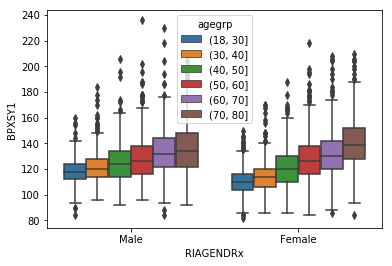

In [12]:
# Note that we can maximum have 3 variables to plot boxplots:
sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=da)